<a href="https://colab.research.google.com/github/vis-hal-k/Internship_Data_science/blob/main/DataScience_Topics/SoftMax_trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SoftMax / MultiNomial Function

In [1]:
iriscsv = "/content/drive/MyDrive/Colab Notebooks/DeepLearn-TopicsTheory-lab/Soft_max-Function/iris.csv"

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix 
from sklearn.linear_model import LogisticRegression

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head(300) 
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

   

```
['setosa', 'versicolor', 'virginica] 
# becoome  
    0         1              2
```



In [5]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.species.unique()

array([0, 1, 2])

In [7]:
df = df[['sepal_length' , 'petal_length' , 'species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [8]:
# Check Null Value
df.isna().sum()

sepal_length    0
petal_length    0
species         0
dtype: int64

In [9]:
x = df.iloc[: , 0 : 2]
y = df.iloc[: , -1]
display(x.shape , y.shape)
x,y

(150, 2)

(150,)

(     sepal_length  petal_length
 0             5.1           1.4
 1             4.9           1.4
 2             4.7           1.3
 3             4.6           1.5
 4             5.0           1.4
 ..            ...           ...
 145           6.7           5.2
 146           6.3           5.0
 147           6.5           5.2
 148           6.2           5.4
 149           5.9           5.1
 
 [150 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: species, Length: 150, dtype: int64)

In [10]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state =2)


In [11]:
# clf
# Multinomial -> softmax function.
clf = LogisticRegression(multi_class = 'multinomial')

In [12]:
clf.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [13]:
y_pred = clf.predict(x_test)

In [14]:
print(accuracy_score(y_test , y_pred))

0.9666666666666667


In [15]:
#  pd.DataFrame(confusion_matrix(y_test,y_pred))

In [16]:
#  this query means-> if sepa,petal is 3.4,2.7 then predict the possibilty 
#  of coming ['setosa', 'versicolor', 'virginica'] in 0,1,2
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [17]:
clf.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [18]:
#  array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])
#  this is the probality of getting :
#        ['setosa', 'versicolor', 'virginica] 
#             0         1              2
#Conclusion is of more chance of getting is "setosa".
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [20]:
type(x)

pandas.core.frame.DataFrame

In [21]:
X = np.asarray(x)
y = np.asarray(y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


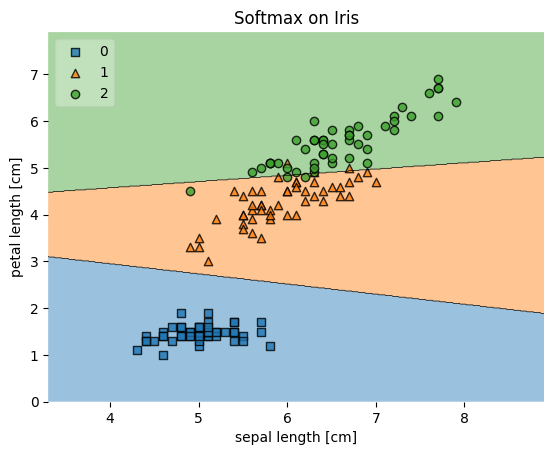

In [22]:
# from matplotlib import axis
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf, legend=2)
# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Softmax on Iris')
plt.show()